In [ ]:
def per_image_standardization(image):
    """
    This function creates a custom per image standardization
    transform which is used for data augmentation.
    params:
        - image (torch Tensor): Image Tensor that needs to be standardized.
    
    returns:
        - image (torch Tensor): Image Tensor post standardization.
    """
    # get original data type
    orig_dtype = image.dtype

    # compute image mean
    image_mean = torch.mean(image, dim=(-1, -2, -3))

    # compute image standard deviation
    stddev = torch.std(image, axis=(-1, -2, -3))

    # compute number of pixels
    num_pixels = torch.tensor(torch.numel(image), dtype=torch.float32)

    # compute minimum standard deviation
    min_stddev = torch.rsqrt(num_pixels)

    # compute adjusted standard deviation
    adjusted_stddev = torch.max(stddev, min_stddev)

    # normalize image
    image -= image_mean
    image = torch.div(image, adjusted_stddev)

    # make sure that image output dtype  == input dtype
    assert image.dtype == orig_dtype

    return image

def shuffle_pixels(image, idx):
    image = image.reshape(3,-1)
    image = image[:,idx]
    image = image.reshape(3,28,28)
    return image

class myNormalize(object):
    def __call__(self,img):
        return  per_image_standardization(img)

class myShuffle(object):
    def __init__(self, shape):
        self.idx = torch.randperm(shape)
    def __call__(self,img):
        return  shuffle_pixels(img, self.idx)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 28, 28])
torch.Size([4])


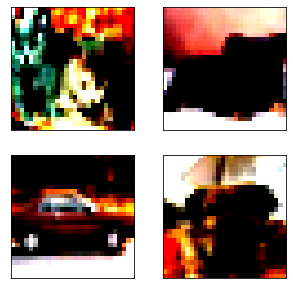

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 28, 28])
torch.Size([4])


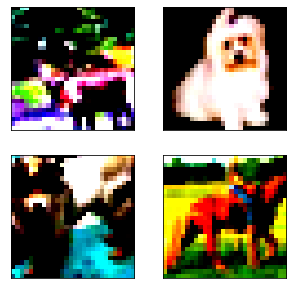

In [ ]:
import torchvision.transforms as transforms
import torchvision
import torch
import matplotlib.pyplot as plt

BATCH_SIZE = 4

transform_train = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_ColorJitter)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

# Training from the training dataset sample
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    print(inputs[0].shape)
    print(labels.shape)
    inputs = torch.movedim(inputs, 1, -1)

    # plt.imshow(inputs[0])

    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 28, 28])
torch.Size([4])


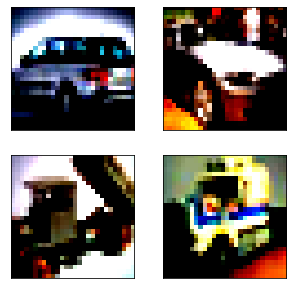

In [ ]:
#ColorJitter

transform_ColorJitter = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.ColorJitter(),
    myNormalize()
    ])

#RandomCrop

transform_RandomCrop = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomCrop(28, padding=12),
    myNormalize()
    ])

#RandomHorizontalFlip

transform_RandomHorizontalFlip = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    myNormalize()
    ])

#RandomPerspective

transform_RandomPerspective = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomPerspective(),
    myNormalize()
    ])

#RandomRotation

transform_RandomRotation = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomRotation(60),
    myNormalize()
    ])
    
#RandomErasing

transform_RandomErasing = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomErasing(),
    myNormalize()
    ])

#ShufflePixels

transform_ShufflePixels = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myShuffle(28*28),
    myNormalize()
    ])


In [ ]:
type(trainset.targets)

list

In [ ]:
import random
mylist = ["apple", "banana", "cherry"]
random.shuffle(mylist)

print(mylist)

['cherry', 'apple', 'banana']


In [ ]:
random.shuffle(trainset.targets)


In [ ]:
trainset.targets[:10]

[1, 2, 5, 4, 0, 7, 8, 1, 6, 2]